In [1]:
from PIL import Image

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import cv2

import utils
import viz


In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [ ]:
# Ignore this cell for now
# Read .xlsx file and extract image IDs for each plant
raw_data = pd.read_excel('../Area_weight_table.xlsx', sheet_name=7)
raw_data.shape
#print(raw_data)
# ImageID is a list because some plants have >1 images associated(top + side views)
images = []
for i in raw_data.index:
    ruler_marking1 = raw_data['Pixel Position1 (x,y)'][i]
    ruler_marking2 = raw_data['Pixel Position2 (x,y)'][i]


In [125]:
# filename is the image number as saved in the imagename. Check image name corresponding to each plant from file
filename = 8937
pil_image = Image.open('../lettuce_images/jpg_images/IMG_{}_cropped.jpg'.format(filename))
pil_scaleImage = Image.open('../lettuce_images/jpg_images/IMG_{}.jpg'.format(filename))

img = utils.resize_image(pil_image)   #cropped image for segmentation
img_scale = utils.resize_image(pil_scaleImage)  #original image for cm extraction

<IPython.core.display.Javascript object>


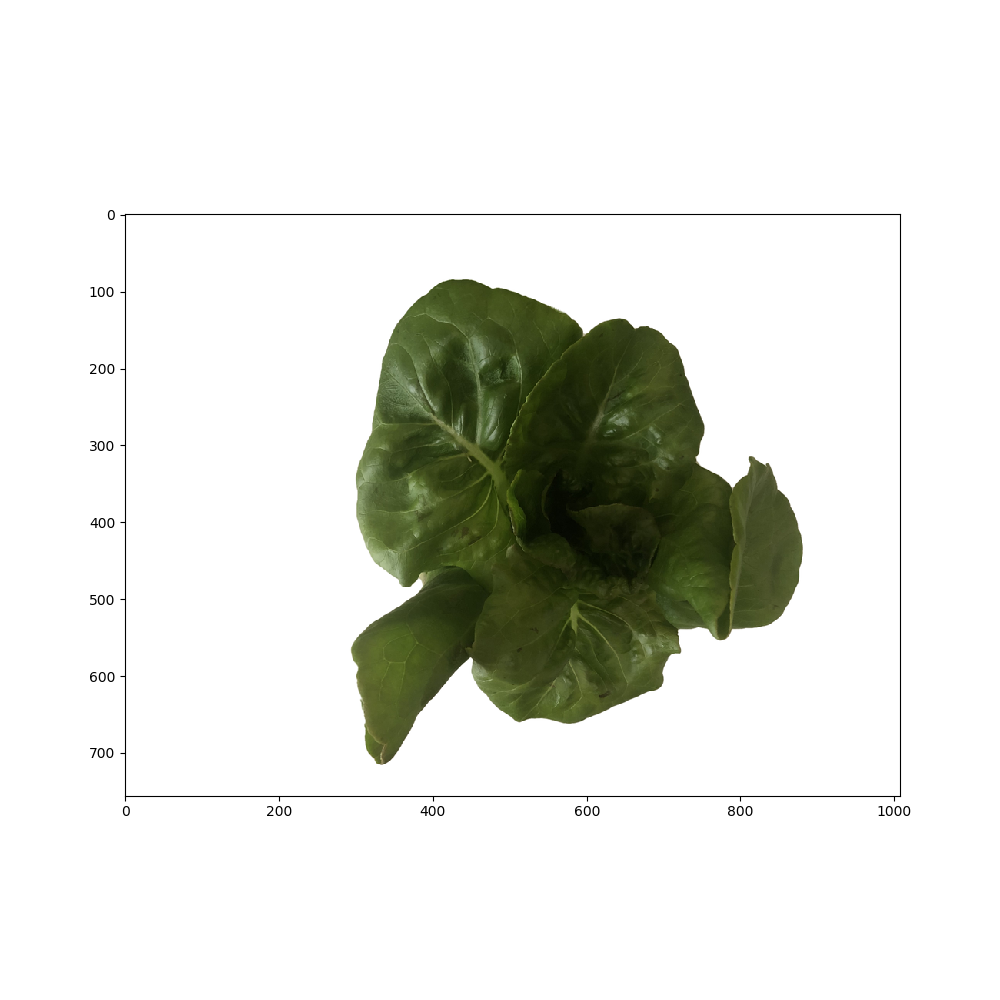

In [126]:
# Display original image
fig = plt.figure(figsize=(10,10)); 
ax = fig.add_subplot(111); 
ax.imshow(img)
plt.show() 

<IPython.core.display.Javascript object>


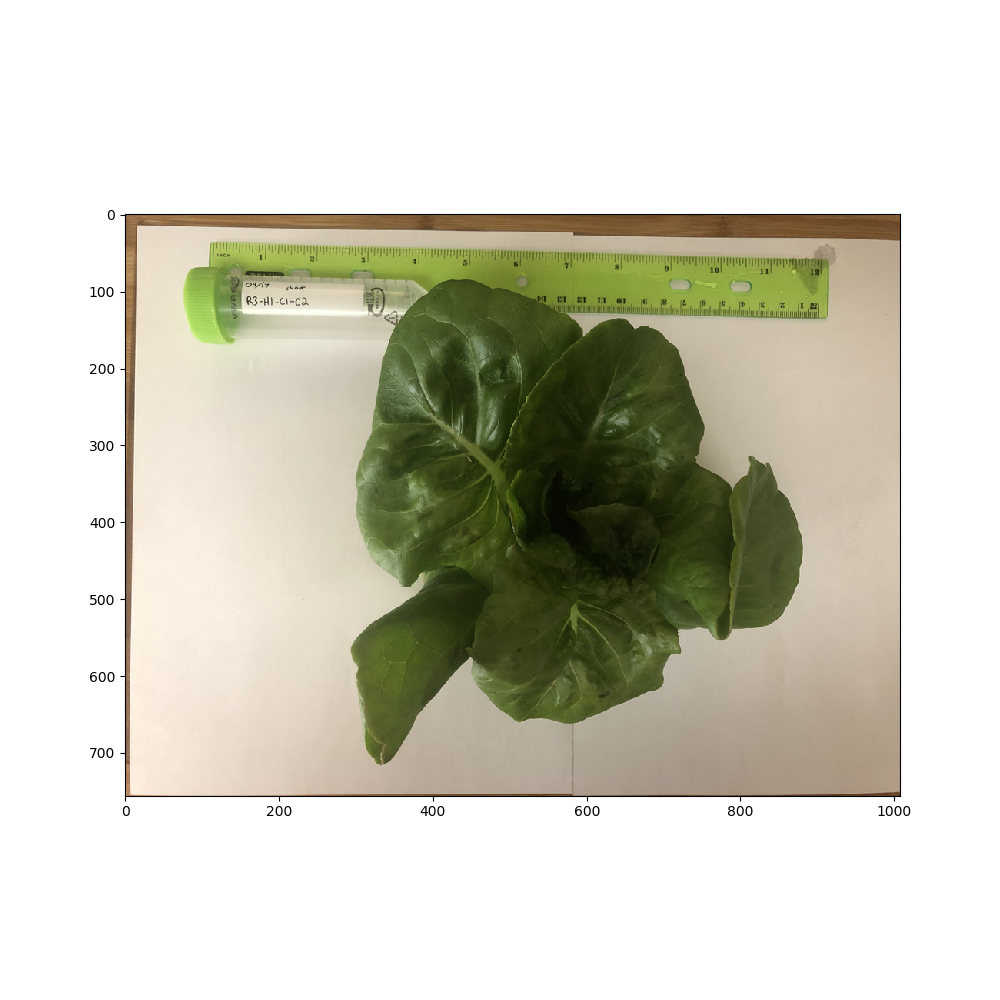

In [127]:
# Display image for ruler selection
fig = plt.figure(figsize=(10,10)); 
ax = fig.add_subplot(111); 
ax.imshow(img_scale)
plt.show() 

# Detect the scale

**Note** User input required

Note down the coordinates (x,y) of 2 points so that they are 1 cm apart on the ruler.

You can zoom in as required using the square botton, and reset the view with the home button

In [128]:
#########################
# TODO: manual input
x1, y1 = 902.018, 136.447
x2, y2 = 876.005, 136.447
#########################

In [129]:
# compute the pixel distance corresponding to 1 cm
pixel_dist = np.sqrt((x1-x2)**2 + (y1-y2)**2)
pixel_area_cmsq = pixel_dist**2

print('The pixel area corresponding to 1 sq. cm = ', pixel_area_cmsq)

The pixel area corresponding to 1 sq. cm =  676.6761690000018


Segment non-white areas as plant from cropped image

<IPython.core.display.Javascript object>


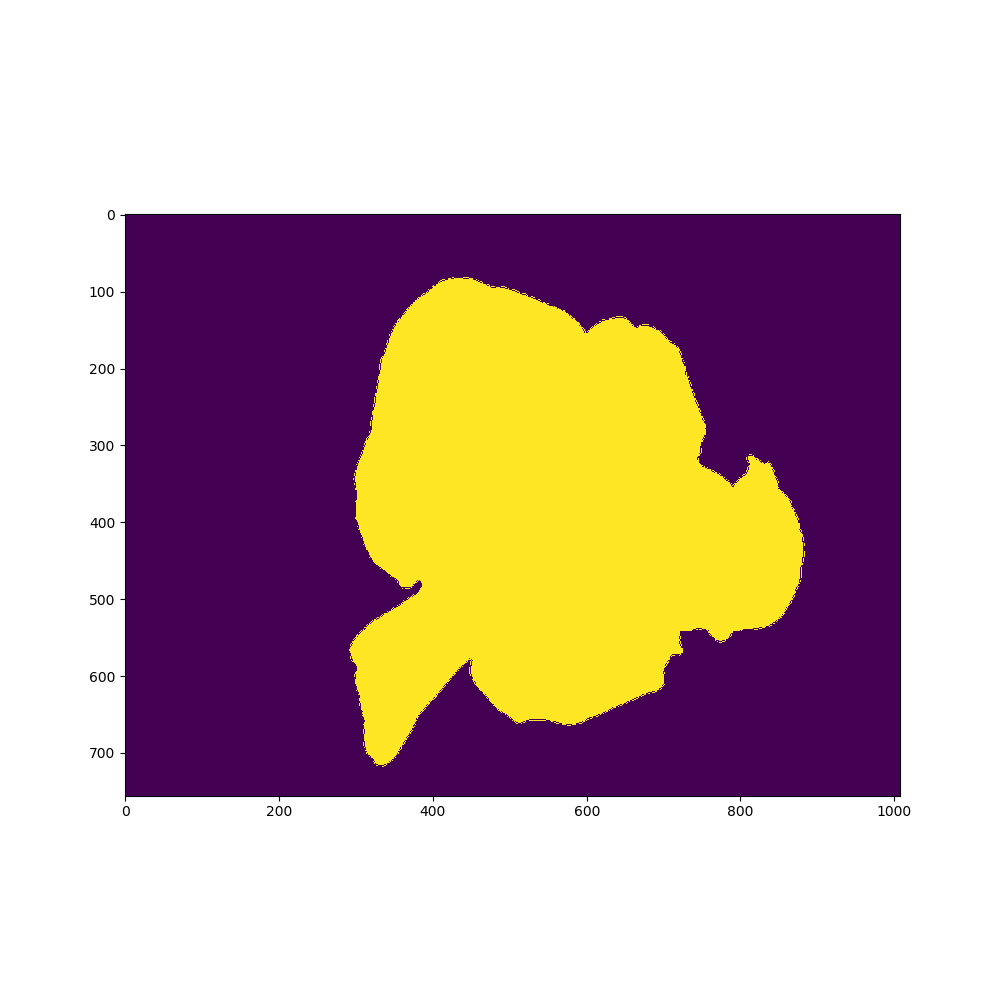

In [130]:
# Extract non-white area of image
mask_blck = img.copy()
mask_blck = np.all(mask_blck != [255,255,255], axis=-1)

plt.figure(figsize=(10,10))
plt.imshow(mask_blck)
plt.show()

# Segment the plant

In [131]:
# Compute the plant area
plant_pixel_area = float(np.sum(mask_blck, axis=None).item())
plant_scaled_area = plant_pixel_area/pixel_area_cmsq

In [132]:
print('Area of plant in pixels: {:.2f}'.format(plant_pixel_area))
print('Area of plant in sq cm: {:.2f}'.format(plant_scaled_area))

Area of plant in pixels: 244444.00
Area of plant in sq cm: 361.24


In [133]:
# temp = np.zeros(mask.shape, dtype=np.uint8)
# temp[mask] = 255

# id_objs, obj_heirarchy = utils.get_plant_object(img, temp)

In [82]:
# colors = [
#     (180, 119, 31),
#     (4, 255, 127),
#     (44, 160, 44),
#     (40, 39, 214),
#     (189, 103, 148),
#     (75, 86, 140),
#     (194, 119, 227),
#     (34, 189, 188),
#     (207, 190, 23)
# ]

In [ ]:
# # draw the detected objects
# det_image = img.copy()
# for i, cnt in enumerate(id_objs):
#     cv2.drawContours(det_image, id_objs, i, colors[i%len(colors)], -1, lineType=8, hierarchy=obj_heirarchy)

In [ ]:
# plt.figure()
# plt.imshow(det_image)